# Zadanie domowe -- interpolacja dwusześcienna

Interpolacja dwusześcienna, to podobnie jak w przypadku interpolacji dwuliniowej, rozszerzenie idei interpolacji jednowymiarowej na dwuwymiarową siatkę.
W trakcie jej obliczania wykorzystywane jest 16 pikseli z otoczenia (dla dwuliniowej 4).
Skutkuje to zwykle lepszymi wynikami - obraz wyjściowy jest bardziej gładki i z mniejszą liczbą artefaktów.
Ceną jest znaczny wzrost złożoności obliczeniowej (zostało to zaobserwowane podczas ćwiczenia).

Interpolacja dana jest wzorem:
\begin{equation}
I(i,j) = \sum_{i=0}^{3} \sum_{j=0}^{3} a_{ij} x^i y^j
\end{equation}

Zadanie sprowadza się zatem do wyznaczenia 16 współczynników $a_{ij}$.
W tym celu wykorzystuje się, oprócz wartość w puntach $A$ (0,0), $B$ (1 0), $C$ (1,1), $D$ (0,1) (por. rysunek dotyczący interpolacji dwuliniowej), także pochodne cząstkowe $A_x$, $A_y$, $A_{xy}$.
Pozwala to rozwiązać układ 16-tu równań.

Jeśli zgrupujemy parametry $a_{ij}$:
\begin{equation}
a = [ a_{00}~a_{10}~a_{20}~a_{30}~a_{01}~a_{11}~a_{21}~a_{31}~a_{02}~a_{12}~a_{22}~a_{32}~a_{03}~a_{13}~a_{23}~a_{33}]
\end{equation}

i przyjmiemy:
\begin{equation}
x = [A~B~D~C~A_x~B_x~D_x~C_x~A_y~B_y~D_y~C_y~A_{xy}~B_{xy}~D_{xy}~C_{xy}]^T
\end{equation}

To zagadnienie można opisać w postaci równania liniowego:
\begin{equation}
Aa = x
\end{equation}
gdzie macierz $A^{-1}$ dana jest wzorem:

\begin{equation}
A^{-1} =
\begin{bmatrix}
1& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0 \\
0&  0&  0&  0&  1&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0 \\
-3&  3&  0&  0& -2& -1&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0 \\
2& -2&  0&  0&  1&  1&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0&  1&  0&  0&  0&  0&  0&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  1&  0&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0& -3&  3&  0&  0& -2& -1&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0&  2& -2&  0&  0&  1&  1&  0&  0 \\
-3&  0&  3&  0&  0&  0&  0&  0& -2&  0& -1&  0&  0&  0&  0&  0 \\
0&  0&  0&  0& -3&  0&  3&  0&  0&  0&  0&  0& -2&  0& -1&  0 \\
9& -9& -9&  9&  6&  3& -6& -3&  6& -6&  3& -3&  4&  2&  2&  1 \\
-6&  6&  6& -6& -3& -3&  3&  3& -4&  4& -2&  2& -2& -2& -1& -1 \\
2&  0& -2&  0&  0&  0&  0&  0&  1&  0&  1&  0&  0&  0&  0&  0 \\
0&  0&  0&  0&  2&  0& -2&  0&  0&  0&  0&  0&  1&  0&  1&  0 \\
-6&  6&  6& -6& -4& -2&  4&  2& -3&  3& -3&  3& -2& -1& -2& -1 \\
4& -4& -4&  4&  2&  2& -2& -2&  2& -2&  2& -2&  1&  1&  1&  1 \\
\end{bmatrix}
\end{equation}

Potrzebne w rozważaniach pochodne cząstkowe obliczane są wg. następującego przybliżenia (przykład dla punktu A):
\begin{equation}
A_x = \frac{I(i+1,j) - I(i-1,j)}{2}
\end{equation}
\begin{equation}
A_y = \frac{I(i,j+1) - I(i,j-1)}{2}
\end{equation}
\begin{equation}
A_{xy} = \frac{I(i+1,j+1) - I(i-1,j) - I(i,j-1) + I(i,j)}{4}
\end{equation}

## Zadanie

Wykorzystując podane informacje zaimplementuj interpolację dwusześcienną.
Uwagi:
- macierz $A^{-1}$ dostępna jest w pliku *a_invert.py*
- trzeba się zastanowić nad potencjalnym wykraczaniem poza zakres obrazka (jak zwykle).

Ponadto dokonaj porównania liczby operacji arytmetycznych i dostępów do pamięci koniecznych przy realizacji obu metod interpolacji: dwuliniowej i dwusześciennej.

In [1]:
import cv2
import os
import requests
from matplotlib import pyplot as plt
import numpy as np

url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/05_Resolution/'

fileName = "ainvert.py"
if not os.path.exists(fileName):
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)


In [2]:
#TODO Do samodzielnej implementacji
from ainvert import A_invert as Ai

import matplotlib.pyplot as plt
import numpy as np
import cv2


def imread(path):
    img = cv2.imread(path)
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

def plot_img(img, cmap='gray', title=''):
    plt.figure(figsize=(img.shape[0]/30,img.shape[1]/30))
    plt.imshow(img, cmap=cmap)
    plt.axis('off')
    plt.title(title)
    plt.show()

In [7]:
lena = imread('lena.bmp')
chessboard = imread('chessboard.bmp')

In [4]:
def interpolate_bicubic(img, scale_h, scale_w):
    img = img.astype(np.float64)

    def clamp(value, min_value, max_value):
        return max(min(value, max_value), min_value)

    def Ax(hx, wx):
        return (img[clamp(hx, 0, old_h-1), clamp(wx+1, 0, old_w-1)] - 
                img[clamp(hx, 0, old_h-1), clamp(wx-1, 0, old_w-1)]) / 2

    def Ay(hx, wx):
        return (img[clamp(hx+1, 0, old_h-1), clamp(wx, 0, old_w-1)] - 
                img[clamp(hx-1, 0, old_h-1), clamp(wx, 0, old_w-1)]) / 2

    def Axy(hx, wx):
        return (img[clamp(hx+1, 0, old_h-1), clamp(wx+1, 0, old_w-1)] - 
                img[clamp(hx-1, 0, old_h-1), clamp(wx+1, 0, old_w-1)] -
                img[clamp(hx+1, 0, old_h-1), clamp(wx-1, 0, old_w-1)] + 
                img[clamp(hx, 0, old_h-1), clamp(wx, 0, old_w-1)]) / 4

    old_h, old_w = img.shape
    new_h, new_w = int(old_h * scale_h), int(old_w * scale_w)
    result = np.zeros((new_h, new_w), dtype=np.float64)
    
    for hx in range(new_h):
        for wx in range(new_w):
            A_hx = int(hx / scale_h)
            A_wx = int(wx / scale_w)

            neighbors = [
                img[A_hx, A_wx],    
                img[clamp(A_hx, 0, old_h-1), clamp(A_wx+1, 0, old_w-1)],                    
                img[clamp(A_hx+1, 0, old_h-1), clamp(A_wx, 0, old_w-1)],  
                img[clamp(A_hx+1, 0, old_h-1), clamp(A_wx+1, 0, old_w-1)],  
                Ax(A_hx, A_wx), Ax(A_hx, A_wx+1), Ax(A_hx+1, A_wx), Ax(A_hx+1, A_wx+1),
                Ay(A_hx, A_wx), Ay(A_hx, A_wx+1), Ay(A_hx+1, A_wx), Ay(A_hx+1, A_wx+1), 
                Axy(A_hx, A_wx), Axy(A_hx, A_wx+1), Axy(A_hx+1, A_wx), Axy(A_hx+1, A_wx+1)
            ]

            a = Ai @ np.array(neighbors)
            a = a.reshape(4, 4)

            dx = hx / scale_h - A_hx
            dy = wx / scale_w - A_wx

            x_vec = np.array([1, dx, dx**2, dx**3])
            y_vec = np.array([1, dy, dy**2, dy**3])
            result[hx, wx] = x_vec @ a @ y_vec

    return np.clip(result, 0, 255).astype(np.uint8)

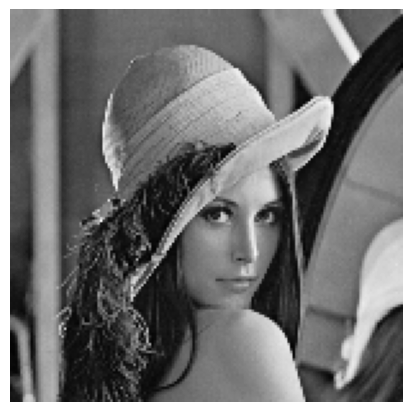

In [5]:
plot_img(interpolate_bicubic(lena , 0.3, 0.3))

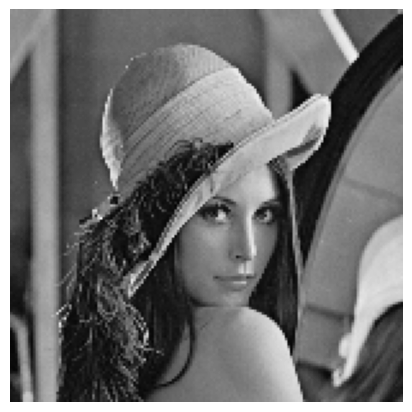

In [6]:
plot_img(cv2.resize(lena, (int(lena.shape[0] * 0.3), int(lena.shape[1] * 0.3)), fx=0.3, fy=0.3, interpolation=cv2.INTER_CUBIC))

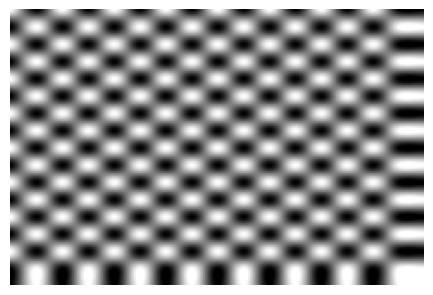

In [10]:
plot_img(interpolate_bicubic(chessboard , 10.0, 15.0))